## **필수과제 1**

# **1-1**

In [51]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE

# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X, y = pd.DataFrame(california.data, columns=california.feature_names), california.target

In [52]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


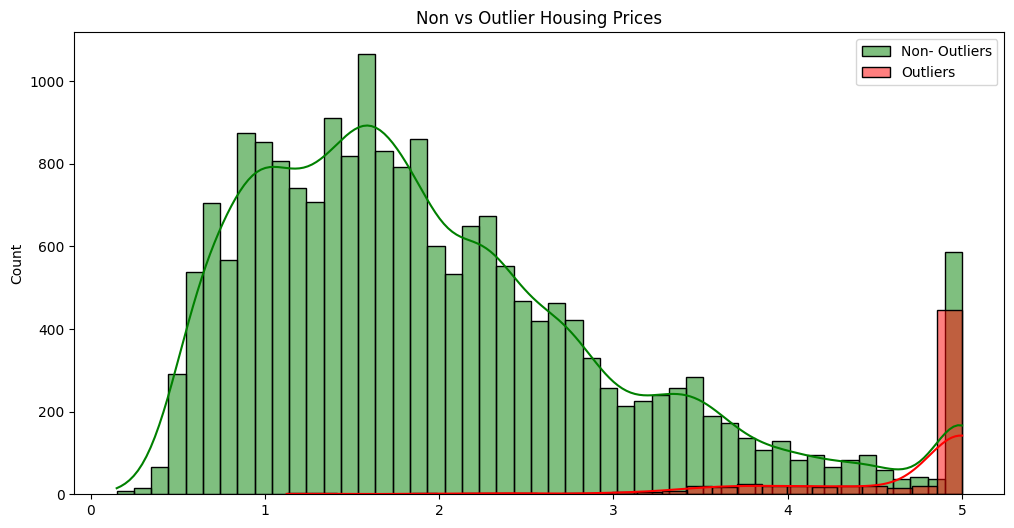

In [53]:
Q1=X['MedInc'].quantile(0.25)
Q3=X['MedInc'].quantile(0.75)
IQR = Q3- Q1

# IQR 지수로만 만들자!
# 이상치 여부 컬럼
X['Outlier_MedInc'] = ((X['MedInc'] < (Q1 - 1.5*IQR)) | (X['MedInc'] >(Q3+1.5*IQR)))

# 이상치와 이상치가 아닌 값들의 집값 데이터를 확인
non_outlier_prices = y[X['Outlier_MedInc']==False]
outlier_prices = y[X['Outlier_MedInc']==True]

## 시각화를 통해서 이상치들을 비교해 보자!
plt.figure(figsize=(12,6))
sns.histplot(non_outlier_prices, color='green', kde=True, label='Non- Outliers')
sns.histplot(outlier_prices, color='red', kde=True, label='Outliers')
plt.title('Non vs Outlier Housing Prices')
plt.legend()
plt.show()

In [54]:
from scipy import stats

# 이상치와 이상치가 아닌 값들의 집값 데이터

t_stat, p_value = stats.ttest_ind(non_outlier_prices, outlier_prices, equal_var=False )

print(f'T-static : {t_stat}')
print(f'p-value : {p_value}')

# p-value
if p_value <0.05:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.')
else:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하지 않다.')

T-static : -96.60151073759215
p-value : 0.0
이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.


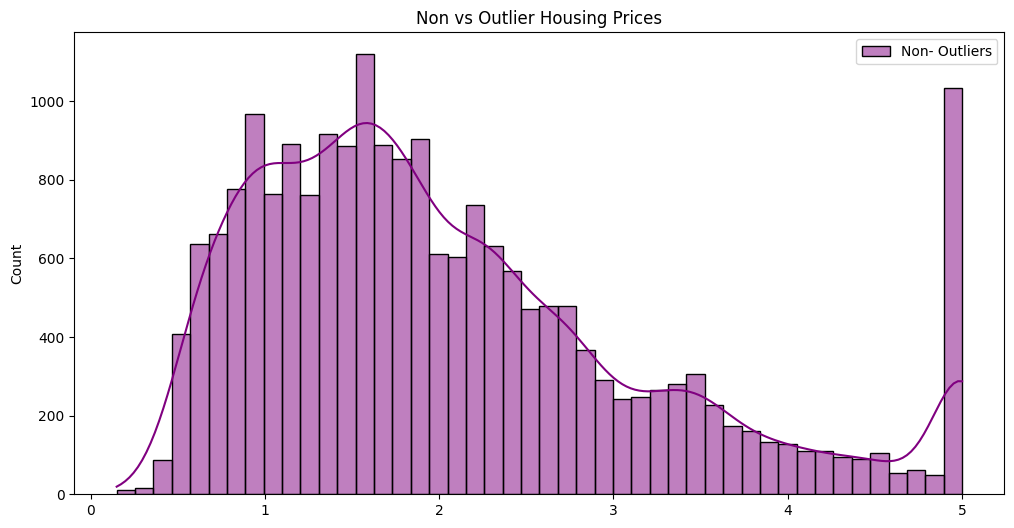

In [55]:
Q1=X['HouseAge'].quantile(0.25)
Q3=X['HouseAge'].quantile(0.75)
IQR = Q3- Q1

# IQR 지수로만 만들자!
# 이상치 여부 컬럼
X['Outlier_HouseAge'] = ((X['HouseAge'] < (Q1 - 1.5*IQR)) | (X['HouseAge'] >(Q3+1.5*IQR)))

# 이상치와 이상치가 아닌 값들의 집값 데이터를 확인
non_outlier_prices = y[X['Outlier_HouseAge']==False]
outlier_prices = y[X['Outlier_HouseAge']==True]

## 시각화를 통해서 이상치들을 비교해 보자!
plt.figure(figsize=(12,6))
sns.histplot(non_outlier_prices, color='purple', kde=True, label='Non- Outliers')
sns.histplot(outlier_prices, color='blue', kde=True, label='Outliers')
plt.title('Non vs Outlier Housing Prices')
plt.legend()
plt.show()

In [56]:
count = X[X["Outlier_HouseAge"] == False].shape[0]
count

20640

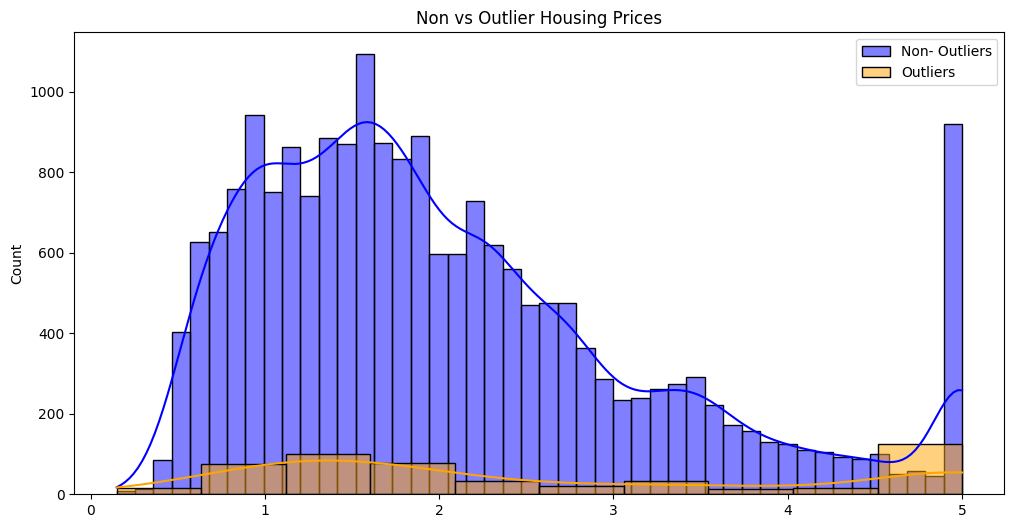

In [57]:
Q1=X['AveRooms'].quantile(0.25)
Q3=X['AveRooms'].quantile(0.75)
IQR = Q3- Q1

# IQR 지수로만 만들자!
# 이상치 여부 컬럼
X['Outlier_AveRooms'] = ((X['AveRooms'] < (Q1 - 1.5*IQR)) | (X['AveRooms'] >(Q3+1.5*IQR)))

# 이상치와 이상치가 아닌 값들의 집값 데이터를 확인
non_outlier_prices = y[X['Outlier_AveRooms']==False]
outlier_prices = y[X['Outlier_AveRooms']==True]

## 시각화를 통해서 이상치들을 비교해 보자!
plt.figure(figsize=(12,6))
sns.histplot(non_outlier_prices, color='blue', kde=True, label='Non- Outliers')
sns.histplot(outlier_prices, color='orange', kde=True, label='Outliers')
plt.title('Non vs Outlier Housing Prices')
plt.legend()
plt.show()

In [58]:
from scipy import stats

# 이상치와 이상치가 아닌 값들의 집값 데이터

t_stat, p_value = stats.ttest_ind(non_outlier_prices, outlier_prices, equal_var=False )

print(f'T-static : {t_stat}')
print(f'p-value : {p_value}')

# p-value
if p_value <0.05:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.')
else:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하지 않다.')

T-static : -7.748619132715463
p-value : 4.862718291576454e-14
이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.


In [59]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Outlier_MedInc,Outlier_HouseAge,Outlier_AveRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,True,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,True,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,False,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,False,False,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,False,False,False
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,False,False,False
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,False,False,False
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,False,False,False


In [60]:
X['Outlier_HouseAge'] = X['Outlier_HouseAge'].astype(int)
X['Outlier_AveRooms'] = X['Outlier_AveRooms'].astype(int)
X['Outlier_MedInc'] = X['Outlier_MedInc'].astype(int)

In [61]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Outlier_MedInc,Outlier_HouseAge,Outlier_AveRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1,0,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1,0,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0,0,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0,0,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0,0,0


In [62]:
X_df =X[['MedInc','Outlier_MedInc','HouseAge','AveRooms','Outlier_AveRooms']]   #HouseAge의 Outlier가 존재하지 않으므로 컬럼에서 제외

X_train,X_test,y_train,y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=111)

In [63]:
lr1= LinearRegression(fit_intercept=True)
lr1.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred1= lr1.predict(X_test)
mse1= mean_squared_error(y_test, y_pred1)

In [71]:
print('R-square{:.10f}'.format(lr1.score(X_train, y_train)))
print(f'MSE:{mse1}')

R-square0.5190938049
MSE:0.6790353593321293


In [66]:
# OLS로 평가

X_const1 = sm.add_constant(X[['MedInc','Outlier_MedInc','HouseAge','AveRooms','Outlier_AveRooms']]) #상수항 추가

ml1 = sm.OLS(y, X_const1).fit()
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4349.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:44:45   Log-Likelihood:                -24814.
No. Observations:               20640   AIC:                         4.964e+04
Df Residuals:                   20634   BIC:                         4.969e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0219      0.024  

R-square0.51909


MSE:0.6790353593321293


이전보다 R-squared 값은 올라가고 mse값은 감소하면서 성능이 더 올라간 것을 확인할 수 있다.

# **1-2**

In [73]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
lr2= LinearRegression(fit_intercept=True)
lr2.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
y_pred2= lr2.predict(X_test_scaled)
mse2= mean_squared_error(y_test, y_pred2)

In [76]:
print('R-square:{:.10f}'.format(lr2.score(X_train_scaled, y_train)))
print(f'MSE:{mse2}')

R-square:0.5190938049
MSE:0.6790353593321292


In [77]:
import numpy as np

X_train_log = np.log(X_train_scaled + 1) # 0이 있을 수 있으므로 1을 더해줌
X_test_log = np.log(X_test_scaled + 1)

In [78]:
lr3= LinearRegression(fit_intercept=True)
lr3.fit(X_train_log, y_train)

LinearRegression()

In [79]:
y_pred3= lr3.predict(X_test_log)
mse3= mean_squared_error(y_test, y_pred3)

In [80]:
print('R-square:{:.10f}'.format(lr3.score(X_train_log, y_train)))
print(f'MSE:{mse3}')

R-square:0.5252550082
MSE:0.6689832323352362


# 코드 결과

스케일링 작업 이후 성능이 올라가지는 않았다.


정규분포로 변환 이후 R-squared값이 올라가고 MSE는 감소하며 성능이 좋아진 것을 확인할 수 있다.